In [1]:
import tensorflow as tf

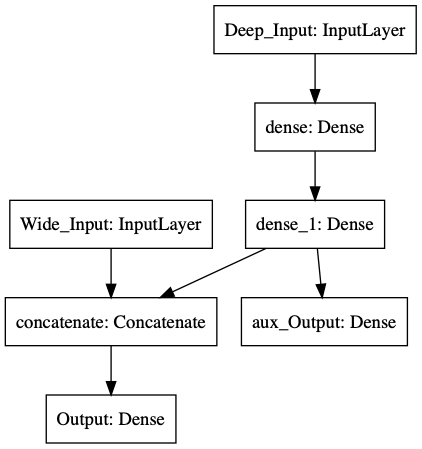

In [2]:
# Define inputs
input_a = tf.keras.Input(shape=[1], name="Wide_Input")
input_b = tf.keras.Input(shape=[1], name="Deep_Input")

# Hidden - Deep Path
hidden_1 = tf.keras.layers.Dense(30, activation='relu')(input_b)
hidden_2 = tf.keras.layers.Dense(30, activation='relu')(hidden_1)

# Define merged path
concat = tf.keras.layers.concatenate([input_a, hidden_2])
output = tf.keras.layers.Dense(1, name="Output")(concat)

# Define another output for the deep path
aux_output = tf.keras.layers.Dense(1, name="aux_Output")(hidden_2)

# build the model
model = tf.keras.Model(inputs=[input_a, input_b], outputs=[output, aux_output])

# Visualize architecture
tf.keras.utils.plot_model(model)

## Implement as a Class

In [4]:
class WideAndDeepModel(tf.keras.Model):
    def __init__(self, units=30, activation='relu', **kwargs):
        super().__init__(**kwargs)
        self.hidden1 = tf.keras.layers.Dense(units, activation=activation)
        self.hidden2 = tf.keras.layers.Dense(units, activation=activation)
        self.main_output = tf.keras.layers.Dense(1)
        self.aux_output = tf.keras.layers.Dense(1)
        
    def call(self, inputs):
        input_A, input_B = inputs
        hidden1 = self.hidden1(input_B)
        hidden2 = self.hidden2(hidden1)
        
        concat = tf.keras.layers.concatenate([input_A, hidden2])
        main_output = self.main_output(concat)
        aux_output = self.main_output(hidden2)
        
        return main_output, aux_output

In [5]:
model = WideAndDeepModel()

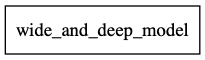

In [6]:
tf.keras.utils.plot_model(model)